# Projecto Zipline

### Importamos todas las librerás requeridas y sus respectivos magics para buen funcionamiento

In [1]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from zipline.api import order, record, symbol
%matplotlib notebook
%load_ext zipline

### Realizamos la importacion de los datos de 4 diferentes empresas par pruebas: Tesla, Google, Apple y Nvidia

In [2]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2017,12,31)

In [3]:
tsla = web.DataReader('TSLA','google',start,end)
goog = web.DataReader('GOOG','google',start,end)
appl = web.DataReader('AAPL','google',start,end)
nvda = web.DataReader('NVDA','google',start,end)
#plt.get_backend()

/home/jorge/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


### Revisamos informacion de los datos recibidos

In [4]:
tsla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-01-02,35.00,35.45,34.70,35.36,1194710
2013-01-03,35.18,35.45,34.75,34.77,741941
2013-01-04,34.80,34.80,33.92,34.40,673993
2013-01-07,34.80,34.80,33.90,34.34,441909
2013-01-08,34.50,34.50,33.11,33.68,1283985


In [5]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-01-02 to 2017-12-29
Data columns (total 5 columns):
Open      1259 non-null float64
High      1259 non-null float64
Low       1259 non-null float64
Close     1259 non-null float64
Volume    1259 non-null int64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


### Graficamos los valores de apertura de cada empresa por separado y al final enn un conjunto

<IPython.core.display.Javascript object>


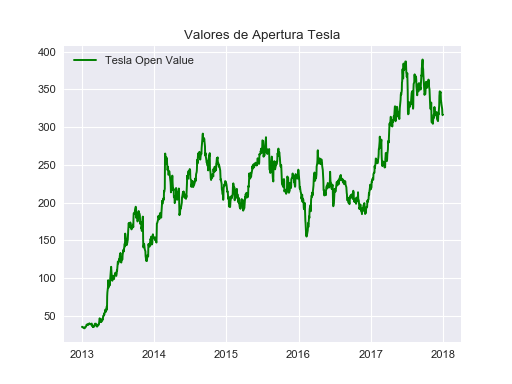

In [12]:
plt.figure(1)
tsla_plot = plt.subplot()
tsla_plot.plot(tsla['High'],color='green')
plt.legend(['Tesla Open Value'],loc="upper left")
plt.title('Valores de Apertura Tesla')

<IPython.core.display.Javascript object>


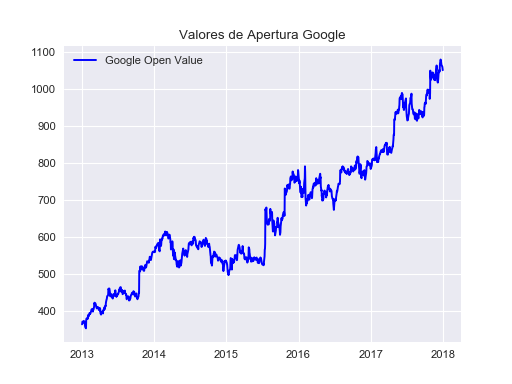

In [13]:
plt.figure(2)
goog_plot = plt.subplot()
goog_plot.plot(goog['High'],color='blue')
plt.legend(['Google Open Value'],loc="upper left")
plt.title('Valores de Apertura Google')

<IPython.core.display.Javascript object>


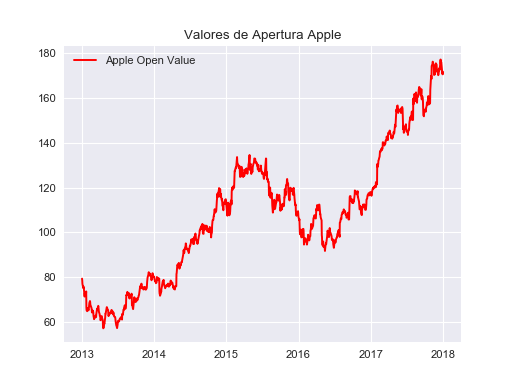

In [14]:
plt.figure(3)
appl_plot = plt.subplot()
appl_plot.plot(appl['High'],color='red')
plt.legend(['Apple Open Value'],loc="upper left")
plt.title('Valores de Apertura Apple')

<IPython.core.display.Javascript object>


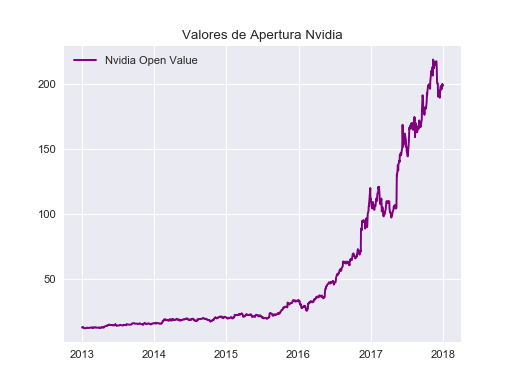

In [15]:
plt.figure(4)
nvda_plot = plt.subplot()
nvda_plot.plot(nvda['High'],color='purple')
plt.legend(['Nvidia Open Value'],loc="upper left")
plt.title('Valores de Apertura Nvidia')

<IPython.core.display.Javascript object>


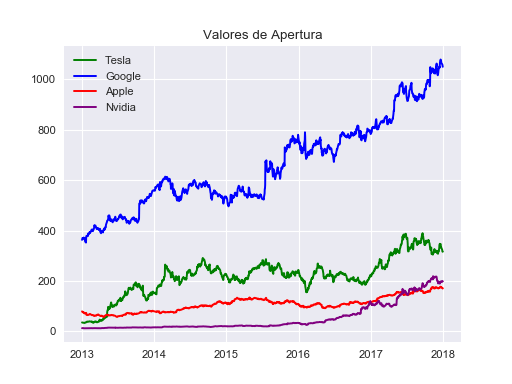

In [16]:
plt.figure(5)
tsla_plot=plt.subplot()
goog_plot=plt.subplot()
appl_plot=plt.subplot()
nvda_plot=plt.subplot()
tsla_plot.plot(tsla['High'],color='green')
goog_plot.plot(goog['High'],color='blue')
appl_plot.plot(appl['High'],color='red')
nvda_plot.plot(nvda['High'],color='purple')
plt.legend(['Tesla','Google','Apple','Nvidia'],loc="upper left")
plt.title('Valores de Apertura')